<a href="https://colab.research.google.com/github/abhinavnn2002/bone-fracture-classification-using-cnn/blob/main/bone_fracture_classidfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
bmadushanirodrigo_fracture_multi_region_x_ray_data_path = kagglehub.dataset_download('bmadushanirodrigo/fracture-multi-region-x-ray-data')

print('Data source import complete.')


In [ ]:

import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input/fracture-multi-region-x-ray-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fracture-multi-region-x-ray-data/README.dataset.txt
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/19-rotated3-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/IMG0004347.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/26-rotated2-rotated2-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/1-rotated3-rotated2.jpg
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/0013.png
/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured/12-ro

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bmadushanirodrigo/fracture-multi-region-x-ray-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fracture-multi-region-x-ray-data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_dir = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/'
test_dir = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/'
val_dir = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/'

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                              image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE)

Found 9246 files belonging to 2 classes.
Found 506 files belonging to 2 classes.
Found 829 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
class_names

['fractured', 'not fractured']

In [ ]:
class_names = train_ds.class_names

def show_images(dataset, title):
    plt.figure(figsize=(6, 6))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i+1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])
            plt.axis('off')
    plt.suptitle(title)
    plt.show()

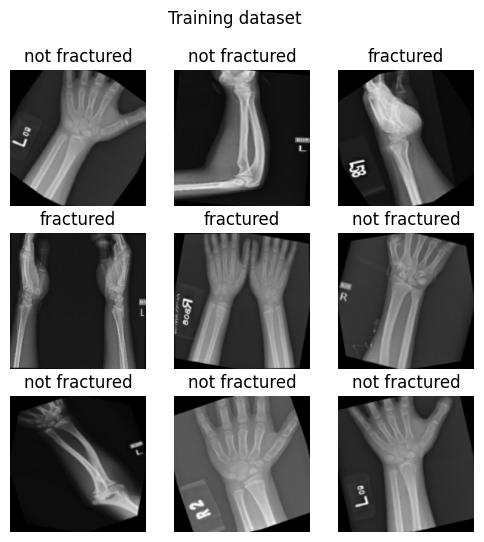

In [ ]:
show_images(train_ds, 'Training dataset')

In [ ]:
from pathlib import Path

In [ ]:
def count_classes(dataset, class_name):
    dataset_path = Path(dataset)
    return len(list(dataset_path.glob(f"{class_name}/*")))

def create_class_counts_df(dataset, class_names):
    counts = {'class': [], 'count': []}
    for class_name in class_names:
        counts['class'].append(class_name)
        counts['count'].append(count_classes(dataset, class_name))
    return pd.DataFrame(counts)

def plot_class_distribution(df, title, palette="viridis"):
    sns.barplot(x='class', y='count', data=df, palette=palette)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

def plot_class_pie_chart(df, title):
    plt.pie(df['count'], labels=df['class'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df)))
    plt.title(title)
    plt.axis('equal')
    plt.show()

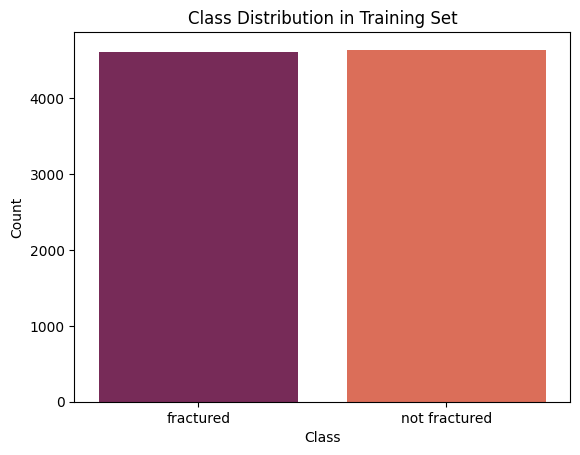

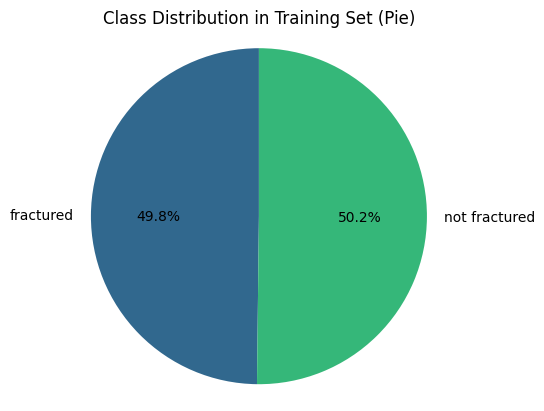

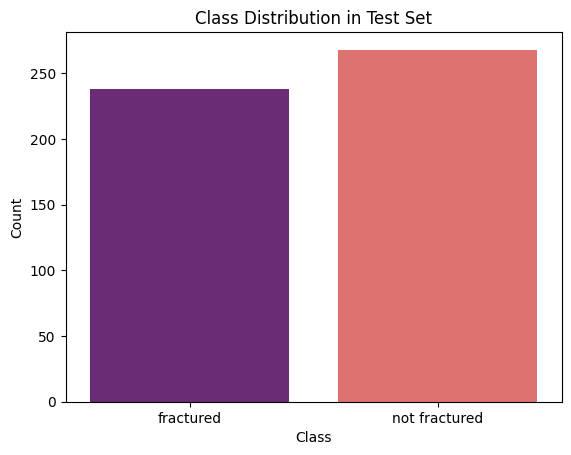

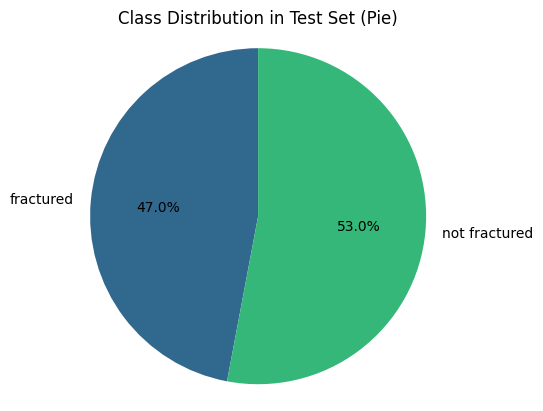

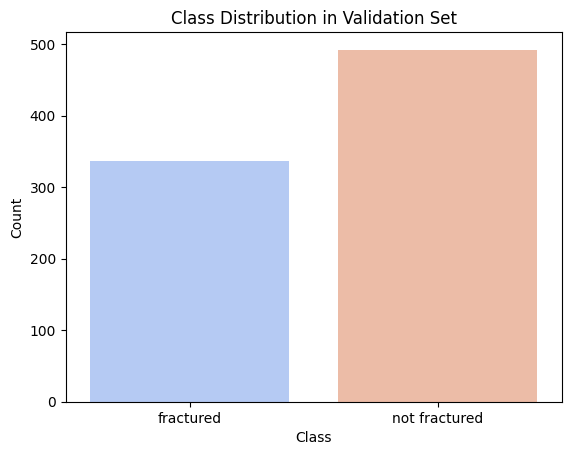

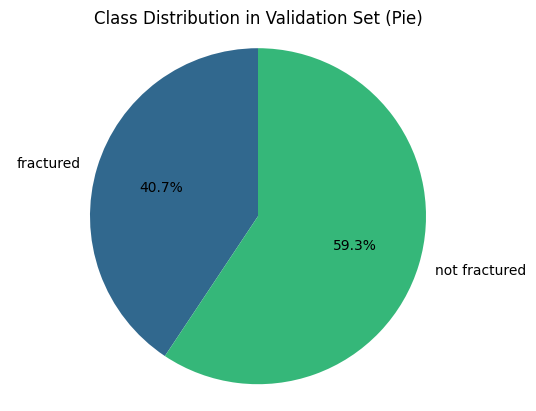

In [ ]:
class_names = ['fractured', 'not fractured']

train_df = create_class_counts_df(train_dir, class_names)
test_df = create_class_counts_df(test_dir, class_names)
val_df = create_class_counts_df(val_dir, class_names)

plot_class_distribution(train_df, 'Class Distribution in Training Set', palette='rocket')
plot_class_pie_chart(train_df, 'Class Distribution in Training Set (Pie)')

plot_class_distribution(test_df, 'Class Distribution in Test Set', palette='magma')
plot_class_pie_chart(test_df, 'Class Distribution in Test Set (Pie)')

plot_class_distribution(val_df, 'Class Distribution in Validation Set', palette='coolwarm')
plot_class_pie_chart(val_df, 'Class Distribution in Validation Set (Pie)')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=32,
                                                class_mode='binary')

Found 9246 images belonging to 2 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(test_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=32,
                                                class_mode='binary')

Found 506 images belonging to 2 classes.


In [ ]:
val_set = train_datagen.flow_from_directory(val_dir,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                batch_size=32,
                                                class_mode='binary')

Found 829 images belonging to 2 classes.


**DEFINIING THE MODEL**

In [ ]:
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),

    # Dense Layer with Dropout
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,385 (1.74 MB)

 Trainable params: 455,425 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

**compiling the model**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
history = model.fit(training_set,
                    validation_data=val_set,
                    epochs=10,
                    batch_size=BATCH_SIZE)

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 138s 467ms/step - accuracy: 0.7270 - loss: 0.5493 - val_accuracy: 0.6586 - val_loss: 0.6749
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 89s 300ms/step - accuracy: 0.8341 - loss: 0.3789 - val_accuracy: 0.7201 - val_loss: 0.7717
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 92s 310ms/step - accuracy: 0.8789 - loss: 0.2925 - val_accuracy: 0.8010 - val_loss: 0.5522
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 90s 301ms/step - accuracy: 0.9092 - loss: 0.2364 - val_accuracy: 0.8552 - val_loss: 0.3885
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 89s 303ms/step - accuracy: 0.9415 - loss: 0.1581 - val_accuracy: 0.8130 - val_loss: 0.4709
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 88s 298ms/step - accuracy: 0.9514 - loss: 0.1329 - val_accuracy: 0.8106 - val_loss: 0.4147
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 89s 302ms/step - accuracy: 0.9647 - loss: 0.0984 - val_accuracy: 0.7600 - val_loss: 0.6352
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 89s 302ms/step - accuracy: 0.9707 - loss: 

In [ ]:
history = model.fit(training_set,
                   validation_data=test_set,
                   epochs=10
                   )

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 93s 316ms/step - accuracy: 0.9864 - loss: 0.0484 - val_accuracy: 0.8735 - val_loss: 0.3009
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 86s 290ms/step - accuracy: 0.9873 - loss: 0.0443 - val_accuracy: 0.9328 - val_loss: 0.1438
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 85s 289ms/step - accuracy: 0.9840 - loss: 0.0475 - val_accuracy: 0.9269 - val_loss: 0.1710
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 86s 292ms/step - accuracy: 0.9870 - loss: 0.0400 - val_accuracy: 0.9170 - val_loss: 0.1929
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 86s 291ms/step - accuracy: 0.9905 - loss: 0.0304 - val_accuracy: 0.9209 - val_loss: 0.2203
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 86s 291ms/step - accuracy: 0.9865 - loss: 0.0401 - val_accuracy: 0.9387 - val_loss: 0.1611
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 86s 290ms/step - accuracy: 0.9888 - loss: 0.0350 - val_accuracy: 0.8834 - val_loss: 0.3298
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 86s 291ms/step - accuracy: 0.9881 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 442ms/step - accuracy: 0.9772 - loss: 0.0836
Test Accuracy: 0.97
Test Loss: 0.11


**Plotting training and validation accuracy and loss**

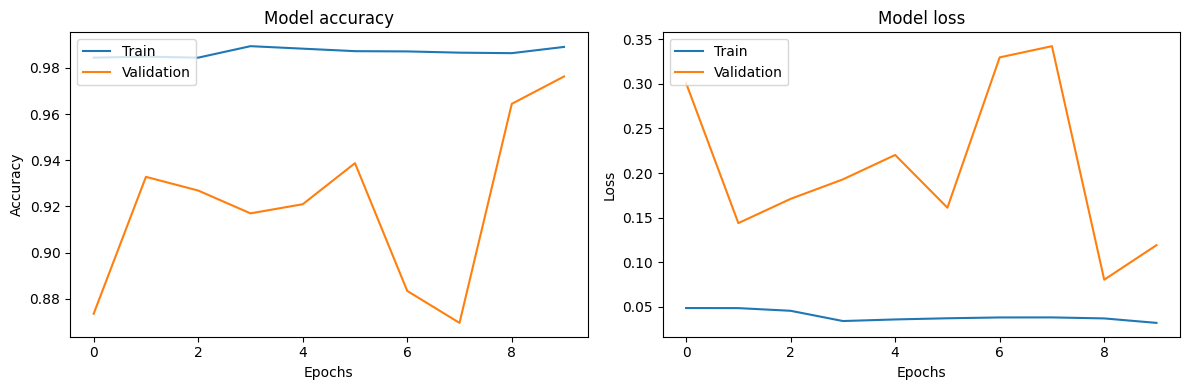

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
model.save('fracture_classification_model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('fracture_classification_model.h5')

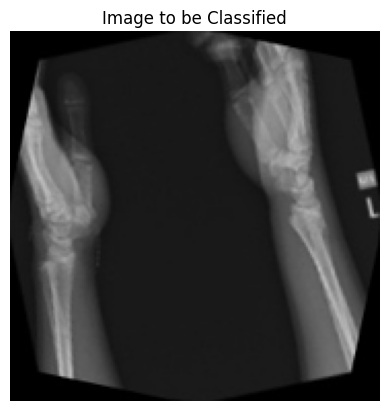

Preprocessed Image Shape: (1, 180, 180, 3)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_preprocessed_image(image_path, img_height=180, img_width=180):

    # Load and preprocess the image
    img = Image.open(image_path).convert('RGB')
    img = img.resize((img_height, img_width))
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Display the image
    plt.imshow(np.array(img))
    plt.axis('off')  # Remove axes for better visualization
    plt.title("Image to be Classified")
    plt.show()

    return img_array

# Test the function with a sample image path
image_path = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured/98-rotated2-rotated1-rotated1.jpg'
preprocessed_img = load_preprocessed_image(image_path)

# Optional: Print the shape of the preprocessed image
print(f"Preprocessed Image Shape: {preprocessed_img.shape}")


**predictions on custom images**

In [ ]:
predictions = loaded_model.predict(preprocessed_img)
predicted_class = np.argmax(predictions, axis=1)  # Assuming categorical output
class_names = ['fractured', 'not fractured']
# For binary classification, use:
predicted_class = (predictions > 0.5).astype("int32")

# Print the predicted class
print(f"Predicted class: {class_names[predicted_class[0][0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: fractured
